Derajat keanggotaan suhu: Normal=0.00, Tinggi=0.67
Derajat keanggotaan nadi: Normal=0.00, Cepat=0.80

=== Hasil inferensi Tsukamoto ===
a1=0.00, z1=50.00
a2=0.80, z2=90.00
Output (z*) = 90.00


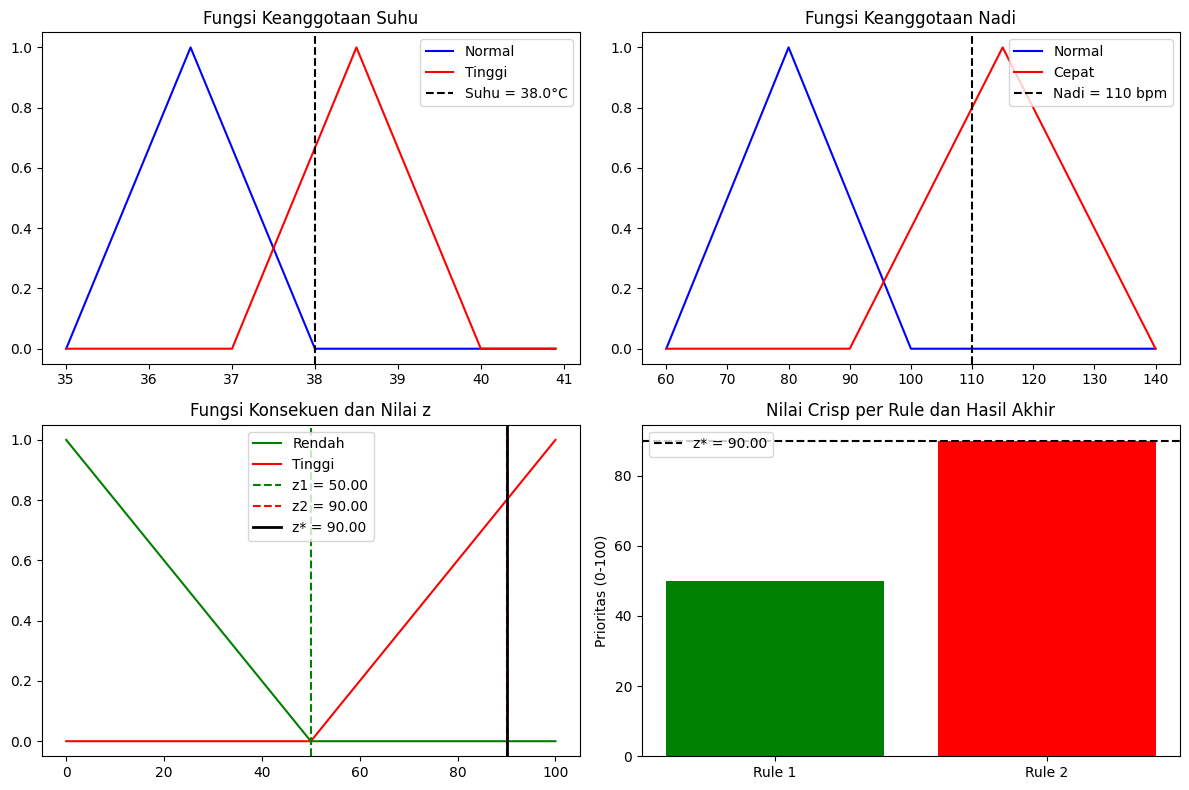

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Domain variabel
x_temp = np.arange(35, 41, 0.1)     # [cite: 28]
x_pulse = np.arange(60, 141, 1)    # [cite: 29]
x_priority = np.arange(0, 101, 1)  # [cite: 30]

# 2. Fungsi keanggotaan Input (Antecedent)
# Suhu
temp_normal = fuzz.trimf(x_temp, [35, 36.5, 38])    # [cite: 33]
temp_high = fuzz.trimf(x_temp, [37, 38.5, 40])      # [cite: 34]
# Nadi
pulse_normal = fuzz.trimf(x_pulse, [60, 80, 100])   # [cite: 36]
pulse_fast = fuzz.trimf(x_pulse, [90, 115, 140])  # [cite: 37]

# 3. Fungsi keanggotaan Output (Consequent)
# Menggunakan fungsi monotonik (sesuai Tsukamoto)
# [cite: 13]
priority_low = fuzz.trimf(x_priority, [0, 0, 50])      # [cite: 40]
priority_high = fuzz.trimf(x_priority, [50, 100, 100]) # [cite: 41]
# 'priority_med'  dihapus karena tidak digunakan dalam rules

# 4. Input pasien
temp_in = 38.0    # [cite: 18, 44]
pulse_in = 110    # [cite: 19, 45]

# 5. Fuzzifikasi
# Mendapatkan nilai derajat keanggotaan
µ_temp_normal = fuzz.interp_membership(x_temp, temp_normal, temp_in) # [cite: 49, 53]
µ_temp_high = fuzz.interp_membership(x_temp, temp_high, temp_in)     # [cite: 50, 54]
µ_pulse_normal = fuzz.interp_membership(x_pulse, pulse_normal, pulse_in) # [cite: 51, 55]
µ_pulse_fast = fuzz.interp_membership(x_pulse, pulse_fast, pulse_in)     # [cite: 52, 56]

print(f"Derajat keanggotaan suhu: Normal={µ_temp_normal:.2f}, Tinggi={µ_temp_high:.2f}")     # [cite: 57, 58]
print(f"Derajat keanggotaan nadi: Normal={µ_pulse_normal:.2f}, Cepat={µ_pulse_fast:.2f}") # [cite: 59]

# 6. Evaluasi Aturan (Rule Evaluation)
# Rule 1: Jika Suhu Normal DAN Nadi Normal -> Prioritas Rendah [cite: 15, 61, 62]
alpha1 = min(µ_temp_normal, µ_pulse_normal) # [cite: 63]

# Rule 2: Jika Suhu Tinggi ATAU Nadi Cepat -> Prioritas Tinggi [cite: 16, 64, 65]
alpha2 = max(µ_temp_high, µ_pulse_fast) # [cite: 66]

# 7. Inferensi Tsukamoto (Mencari nilai z)
# Rule 1 (Rendah - Monotonik turun dari 0-50): z1 = 50 * (1 - alpha1)
z1 = 50 * (1 - alpha1) # [cite: 70]

# Rule 2 (Tinggi - Monotonik naik dari 50-100): z2 = 50 + 50 * alpha2
z2 = 50 + 50 * alpha2 # [cite: 71]

# 8. Defuzzifikasi (Weighted Average)
# [cite: 76]
numerator = (alpha1 * z1) + (alpha2 * z2) # [cite: 77]
denominator = alpha1 + alpha2 # [cite: 77]

# DITAMBAHKAN: Pengecekan ZeroDivisionError
if denominator == 0:
    z = 0  # Nilai default jika tidak ada rule yang aktif
else:
    z = numerator / denominator

print("\n=== Hasil inferensi Tsukamoto ===") # [cite: 79]
print(f"a1={alpha1:.2f}, z1={z1:.2f}") # [cite: 80, 81, 82, 88]
print(f"a2={alpha2:.2f}, z2={z2:.2f}") # [cite: 83, 84, 85, 89]
print(f"Output (z*) = {z:.2f}") # [cite: 86, 90]

# 9. Visualisasi
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # [cite: 93, 96]

# Plot Suhu
axs[0, 0].plot(x_temp, temp_normal, 'b', label='Normal') # [cite: 97]
axs[0, 0].plot(x_temp, temp_high, 'r', label='Tinggi')   # [cite: 98]
axs[0, 0].axvline(temp_in, color='k', linestyle='--', label=f'Suhu = {temp_in}°C') # [cite: 99]
axs[0, 0].set_title('Fungsi Keanggotaan Suhu') # [cite: 100]
axs[0, 0].legend() # [cite: 101]

# Plot Nadi
axs[0, 1].plot(x_pulse, pulse_normal, 'b', label='Normal') # [cite: 104]
axs[0, 1].plot(x_pulse, pulse_fast, 'r', label='Cepat')   # [cite: 105]
axs[0, 1].axvline(pulse_in, color='k', linestyle='--', label=f'Nadi = {pulse_in} bpm') # [cite: 106]
axs[0, 1].set_title('Fungsi Keanggotaan Nadi') # [cite: 107]
axs[0, 1].legend() # [cite: 108]

# Plot Output Konsekuen
axs[1, 0].plot(x_priority, priority_low, 'g', label='Rendah') # [cite: 111]
axs[1, 0].plot(x_priority, priority_high, 'r', label='Tinggi') # [cite: 113]
# 'priority_med'  dihapus

# DIHAPUS: Visualisasi 'fill_between'  karena tidak sesuai untuk Tsukamoto

# Plot nilai z dari tiap rule
axs[1, 0].axvline(z1, color='g', linestyle='--', label=f'z1 = {z1:.2f}') # [cite: 120, 121]
axs[1, 0].axvline(z2, color='r', linestyle='--', label=f'z2 = {z2:.2f}') # [cite: 123, 124]
# Plot hasil akhir z*
axs[1, 0].axvline(z, color='k', linestyle='-', linewidth=2, label=f'z* = {z:.2f}') # [cite: 126]
axs[1, 0].set_title('Fungsi Konsekuen dan Nilai z') # [cite: 127] (Judul diubah)
axs[1, 0].legend()

# Plot Hasil Defuzzifikasi (Bar)
axs[1, 1].bar(['Rule 1', 'Rule 2'], [z1, z2], color=['g', 'r']) # [cite: 130]
axs[1, 1].axhline(z, color='k', linestyle='--', label=f'z* = {z:.2f}') # [cite: 131]
axs[1, 1].set_ylabel('Prioritas (0-100)') # [cite: 132]
axs[1, 1].set_title('Nilai Crisp per Rule dan Hasil Akhir') # [cite: 133]
axs[1, 1].legend()

plt.tight_layout() # [cite: 136]
plt.show() # [cite: 137]

In [3]:
!pip install scikit-fuzzy